<a href="https://colab.research.google.com/github/koalalovepabro/Stock-Portfolio-Optimization/blob/main/Test/Stock_Portfolio(mmt_1month)_ver2.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📈 종목선택 방법**
- 모멘텀 1개월
- 최근에 가장 많이 오른 종목 매수한 후 일정 기간을 보유한 후 파는 전략
- 20 영업일(1개월) 수익률 순위 보여줌


# **📊 포트폴리오 최적화 방법**  
1. **Max Sharpe Ratio** : 샤프비율이 최대가 되도록 포트폴리오 최적화  
    => 수익률과 변동성을 모두 고려
2. **✔ Efficient Risk**   : 주어진 변동성 ( target_volatility ) 보다 낮은 범위 내에서 수익률 (Return)이 최대가 되도록 포트폴리오 최적화  
    => 높은 이익을 추구하기 보다는, 비교적 위험이 낮은 투자를 원하는 투자자에게 추천
3. **Efficient Return** : 주어진 리스크 ( target_return )을 만족시키는 선에서 변동성(volatility)를 최소가 되도록 포트폴리오 최적화  
    => 높은 위험을 감수하더라도, 높은 이익을 추구하는 투자 성향을 가진 투자자에게 추천

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
!pip install -q install finance-datareader

In [3]:
!pip install pykrx

     |████████████████████████████████| 81 kB 4.0 MB/s 
     |████████████████████████████████| 60 kB 3.9 MB/s 
     |████████████████████████████████| 251 kB 8.8 MB/s 


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
from pykrx import stock
import datetime

In [ ]:
# 오늘 KOSPI&KOSDAQ 종목 전체 불러오기
today = datetime.datetime.today().strftime("%Y%m%d")
kospi = stock.get_market_fundamental_by_ticker(today, market='KOSPI').index
kosdaq = stock.get_market_fundamental_by_ticker(today, market='KOSDAQ').index
stocks = kospi.append(kosdaq)
stocks

Index(['095570', '006840', '027410', '282330', '138930', '001460', '001465',
       '001040', '079160', '00104K',
       ...
       '065510', '243070', '084110', '263920', '145020', '024060', '010240',
       '189980', '037440', '238490'],
      dtype='object', name='티커', length=2391)

## 1개월 모멘텀

In [ ]:
def momentum_1month(stocks): # 종목 list넣으면, 모멘텀 순위 있는 데이터프레임 출력
    df = pd.DataFrame()
    for s in stocks:
      df[s] = fdr.DataReader( s, '2021-01-01')['Close']
    
    # 60 영업일 수익률
    return_df = df.pct_change(20)
    return_df
    
    # 오늘 날짜
    today = datetime.datetime.today().strftime("%Y-%m-%d")
    
    # index는 종목 코드이고 모멘텀 데이터 있는 데이터 프레임으로 만들기
    s = return_df.loc[today]
    momentum_df = pd.DataFrame(s)
    momentum_df.columns = ["모멘텀"]
    
    momentum_df['순위'] = momentum_df['모멘텀'].rank(ascending=False)
    momentum_df = momentum_df.sort_values(by='순위')
    return momentum_df # 모멘텀

In [ ]:
momentum_1month_rank = momentum_1month(stocks)

In [ ]:
momentum_1month_rank.head(30)

In [ ]:
momentum_1month_rank.tail(30)

In [ ]:
momentum_1month_rank.to_csv("momentum_1month_rank.csv")

## 미리 csv 파일로 저장해 둔 모멘텀 1개월 결과 불러오기

In [5]:
momentum_1month_rank = pd.read_csv('momentum_1month_rank.csv')
momentum_1month_rank

,Unnamed: 0,모멘텀,순위
0,002410,1.196602,1.0
1,057880,1.155603,2.0
2,003580,1.036232,3.0
3,383310,0.991368,4.0
4,104620,0.988933,5.0
...,...,...,...
2386,221610,-0.450877,2387.0
2387,000325,-0.477419,2388.0
2388,137310,NaN,NaN
2389,352910,NaN,NaN


In [6]:
momentum_1month_rank.index = momentum_1month_rank['Unnamed: 0']
momentum_1month_rank

,Unnamed: 0,모멘텀,순위
Unnamed: 0,,,
002410,002410,1.196602,1.0
057880,057880,1.155603,2.0
003580,003580,1.036232,3.0
383310,383310,0.991368,4.0
104620,104620,0.988933,5.0
...,...,...,...
221610,221610,-0.450877,2387.0
000325,000325,-0.477419,2388.0
137310,137310,NaN,NaN


In [7]:
momentum_1month_rank = momentum_1month_rank.drop('Unnamed: 0', axis=1)
momentum_1month_rank

,모멘텀,순위
Unnamed: 0,,
002410,1.196602,1.0
057880,1.155603,2.0
003580,1.036232,3.0
383310,0.991368,4.0
104620,0.988933,5.0
...,...,...
221610,-0.450877,2387.0
000325,-0.477419,2388.0
137310,NaN,NaN


## 모멘텀 1개월 종목 저장

In [8]:
import requests

In [9]:
assets = np.array(momentum_1month_rank.index[:30])
assets

array(['002410', '057880', '003580', '383310', '104620', '215090',
       '064550', '189330', '293490', '189860', '043360', '289220',
       '150840', '014285', '026940', '011700', '085670', '032080',
       '069410', '139670', '096690', '311690', '244920', '339950',
       '013360', '086960', '024740', '005070', '309930', '101140'],
      dtype=object)

In [10]:
len(assets)

30

### 종목코드와 종목이름을 딕셔너리로 저장

In [11]:
###########추가#############
kospi_temp = fdr.StockListing('KOSPI')[['Symbol', 'Name']]
kosdaq_temp = fdr.StockListing('KOSDAQ')[['Symbol', 'Name']]
code_name_dict = pd.concat([kospi_temp,kosdaq_temp])
code_name_dict = code_name_dict.set_index('Symbol').to_dict().get('Name')
code_name_dict

{'095570': 'AJ네트웍스',
 '006840': 'AK홀딩스',
 '152100': 'ARIRANG 200',
 '295820': 'ARIRANG 200동일가중',
 '253150': 'ARIRANG 200선물레버리지',
 '253160': 'ARIRANG 200선물인버스2X',
 '395750': 'ARIRANG ESG가치주액티브',
 '395760': 'ARIRANG ESG성장주액티브',
 '278420': 'ARIRANG ESG우수기업',
 '292750': 'ARIRANG KRX300',
 '309210': 'ARIRANG KRX300헬스케어',
 '333940': 'ARIRANG KS로우볼가중TR',
 '333950': 'ARIRANG KS로우사이즈가중TR',
 '333960': 'ARIRANG KS모멘텀가중TR',
 '333970': 'ARIRANG KS밸류가중TR',
 '333980': 'ARIRANG KS퀄리티가중TR',
 '269530': 'ARIRANG S&P글로벌인프라',
 '251590': 'ARIRANG 고배당저변동50',
 '161510': 'ARIRANG 고배당주',
 '251600': 'ARIRANG 고배당주채권혼합',
 '289670': 'ARIRANG 국채선물10년',
 '298340': 'ARIRANG 국채선물3년',
 '189400': 'ARIRANG 글로벌MSCI(합성 H)',
 '278620': 'ARIRANG 단기채권액티브',
 '269540': 'ARIRANG 미국S&P500(H)',
 '287180': 'ARIRANG 미국나스닥기술주',
 '213630': 'ARIRANG 미국다우존스고배당주(합성 H)',
 '332610': 'ARIRANG 미국단기우량회사채',
 '332620': 'ARIRANG 미국장기우량회사채',
 '195970': 'ARIRANG 선진국MSCI(합성 H)',
 '238670': 'ARIRANG 스마트베타Quality채권혼합',
 '195980': 'ARIRANG 신흥국MSCI(합성 H

### 3년치 주가 데이터 가져오기

In [12]:
# 종목별 종가 가져오기
from datetime import datetime

#시작일
start_date = '2018-07-19'

# today = datetime.today().strftime('%Y-%m-%d')
end_date = '2021-07-19'

# 각 주식의 일별 종가 데이터를 저장할 데이터 프레임을 생성
#Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

# FinanceDataReader로 각 종목의 종가데이터 불러오기
for stock in assets:
  df[stock] = fdr.DataReader(stock, start_date, end_date)['Close']
df

,002410,057880,003580,383310,104620,215090,064550,189330,293490,189860,043360,289220,150840,014285,026940,011700,085670,032080,069410,139670,096690,311690,244920,339950,013360,086960,024740,005070,309930,101140
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,1735,1885,14400,NaN,NaN,3032,9850,30500,NaN,4575,3145,NaN,12300,7490,2560,2590,3600,1970,8725,1897,3435,NaN,NaN,NaN,1315,19750,1555,24431,NaN,3165
2018-07-20,1750,1945,12000,NaN,NaN,3052,9880,30200,NaN,4400,3520,NaN,12300,7380,2540,2520,3520,1900,8691,1889,3097,NaN,NaN,NaN,1275,19800,1550,23888,NaN,2805
2018-07-23,1620,1801,9310,NaN,NaN,2909,9080,30000,NaN,4080,3395,NaN,11550,6760,2440,2250,3380,1840,8523,1865,2914,NaN,NaN,NaN,1195,18900,1440,22440,NaN,2630
2018-07-24,1665,1810,9990,NaN,NaN,3110,9110,30300,NaN,4400,3340,NaN,11600,7170,2585,2300,3510,1865,8388,1858,2914,NaN,NaN,NaN,1290,19100,1460,23164,NaN,2720
2018-07-25,1650,1638,10500,NaN,NaN,3039,8990,30300,NaN,4250,3320,NaN,11500,7170,2570,2285,3470,1830,8219,1852,2914,NaN,NaN,NaN,1255,18750,1400,23164,NaN,2630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,9500,2560,16850,47417.0,10213.0,1740,33000,81800,83100.0,11450,4360,76000.0,3720,22850,7040,3060,3095,3025,16200,30200,1252,39900.0,11000.0,4445.0,4110,22200,4580,32500,3870.0,4675
2021-07-14,8900,2662,17400,50569.0,10263.0,1750,33300,85000,81200.0,10800,5660,82600.0,3385,29700,7050,3035,3250,3025,15300,28550,1252,40600.0,11150.0,4210.0,4080,21400,5300,37450,4435.0,4685
2021-07-15,8860,2602,17850,50044.0,10614.0,1710,30550,84700,81200.0,11100,6480,82600.0,3925,34500,7050,3945,3115,3000,15450,28300,1230,39800.0,11100.0,4350.0,4110,23200,5400,37400,5760.0,4910


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 740 entries, 2018-07-19 to 2021-07-19
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   002410  740 non-null    int64  
 1   057880  740 non-null    int64  
 2   003580  740 non-null    int64  
 3   383310  37 non-null     float64
 4   104620  610 non-null    float64
 5   215090  740 non-null    int64  
 6   064550  740 non-null    int64  
 7   189330  740 non-null    int64  
 8   293490  211 non-null    float64
 9   189860  740 non-null    int64  
 10  043360  740 non-null    int64  
 11  289220  82 non-null     float64
 12  150840  740 non-null    int64  
 13  014285  740 non-null    int64  
 14  026940  740 non-null    int64  
 15  011700  740 non-null    int64  
 16  085670  740 non-null    int64  
 17  032080  740 non-null    int64  
 18  069410  740 non-null    int64  
 19  139670  740 non-null    int64  
 20  096690  740 non-null    int64  
 21  311690  387 non-null

In [14]:
df.isnull().sum()

002410      0
057880      0
003580      0
383310    703
104620    130
215090      0
064550      0
189330      0
293490    529
189860      0
043360      0
289220    658
150840      0
014285      0
026940      0
011700      0
085670      0
032080      0
069410      0
139670      0
096690      0
311690    353
244920    576
339950    352
013360      0
086960      0
024740      0
005070      0
309930    104
101140      0
dtype: int64

In [15]:
# 결측값 있는 열 삭제 
df2 = df.dropna(axis = 1)
df2

,002410,057880,003580,215090,064550,189330,189860,043360,150840,014285,026940,011700,085670,032080,069410,139670,096690,013360,086960,024740,005070,101140
Date,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,1735,1885,14400,3032,9850,30500,4575,3145,12300,7490,2560,2590,3600,1970,8725,1897,3435,1315,19750,1555,24431,3165
2018-07-20,1750,1945,12000,3052,9880,30200,4400,3520,12300,7380,2540,2520,3520,1900,8691,1889,3097,1275,19800,1550,23888,2805
2018-07-23,1620,1801,9310,2909,9080,30000,4080,3395,11550,6760,2440,2250,3380,1840,8523,1865,2914,1195,18900,1440,22440,2630
2018-07-24,1665,1810,9990,3110,9110,30300,4400,3340,11600,7170,2585,2300,3510,1865,8388,1858,2914,1290,19100,1460,23164,2720
2018-07-25,1650,1638,10500,3039,8990,30300,4250,3320,11500,7170,2570,2285,3470,1830,8219,1852,2914,1255,18750,1400,23164,2630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,9500,2560,16850,1740,33000,81800,11450,4360,3720,22850,7040,3060,3095,3025,16200,30200,1252,4110,22200,4580,32500,4675
2021-07-14,8900,2662,17400,1750,33300,85000,10800,5660,3385,29700,7050,3035,3250,3025,15300,28550,1252,4080,21400,5300,37450,4685
2021-07-15,8860,2602,17850,1710,30550,84700,11100,6480,3925,34500,7050,3945,3115,3000,15450,28300,1230,4110,23200,5400,37400,4910


### 종목별 연평균 기대수익률 & 일간수익률의 공분산

In [16]:
!pip install PyPortfolioOpt

     |████████████████████████████████| 60 kB 3.3 MB/s 
     |████████████████████████████████| 2.7 MB 10.1 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [17]:
# Optimize the portfolio
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

#### ver01> 종가에 결측값이 있는 종목을 삭제하지 않은 df로 포트폴리오 구성 ( 30개 종목 )

In [18]:
# Calculate the expected annualized returns
# 복리 연평균 수익률
# return (1 + returns).prod() ** (frequency / returns.count()) - 1
mu = expected_returns.mean_historical_return(df)

# Calculate the annualized sample covariance matrix of the daily asset returns
S = risk_models.sample_cov(df)

In [19]:
mu

002410      0.697577
057880      0.157554
003580      0.114709
383310    108.816660
104620     -0.032231
215090     -0.121315
064550      0.552052
189330      0.422897
293490      0.430651
189860      0.361153
043360      0.232085
289220     40.879485
150840     -0.317639
014285      0.738276
026940      0.398818
011700      0.183033
085670     -0.029235
032080      0.144957
069410      0.190517
139670      1.460737
096690     -0.234315
311690      0.066659
244920      1.138812
339950      0.479410
013360      0.459463
086960      0.085913
024740      0.498344
005070      0.212140
309930      0.597552
101140      0.129636
dtype: float64

In [20]:
len(mu)

30

In [21]:
S

,002410,057880,003580,383310,104620,215090,064550,189330,293490,189860,043360,289220,150840,014285,026940,011700,085670,032080,069410,139670,096690,311690,244920,339950,013360,086960,024740,005070,309930,101140
002410,0.506621,0.103662,0.072992,0.006617,0.094453,0.118703,0.048834,0.003874,0.020000,0.102290,0.098701,0.054681,0.073137,0.068751,0.216770,0.091661,0.130731,0.083307,0.126867,0.071765,0.080130,0.145313,0.113826,0.031473,0.182547,0.082920,0.067496,0.103433,0.004441,0.054035
057880,0.103662,1.042955,0.078731,0.244951,0.011339,0.100530,0.217234,0.039562,0.083392,0.077809,-0.002848,0.064952,0.104589,0.028851,0.078302,0.033146,0.039265,0.032287,0.081477,0.058200,0.064222,0.100857,0.014794,0.103468,0.055000,0.018436,0.033779,0.062001,0.002753,0.019890
003580,0.072992,0.078731,0.739749,0.112065,0.056885,0.063721,0.084449,-0.008420,0.011201,0.072151,0.052652,-0.051058,0.135179,0.046464,0.086191,0.074478,0.090974,0.052856,0.102506,0.062292,0.064297,0.095911,0.001640,-0.000803,0.112644,0.067186,0.049102,0.102611,0.014526,0.080044
383310,0.006617,0.244951,0.112065,1.225917,-0.082512,0.437100,0.240040,-0.052237,0.003008,-0.186038,-0.134461,0.312938,-0.060166,0.124915,0.118398,0.079784,0.062257,-0.021436,0.045194,-0.194610,0.377157,0.101502,0.089789,-0.207785,-0.076533,0.054754,0.046782,0.272019,0.144591,-0.110107
104620,0.094453,0.011339,0.056885,-0.082512,0.314548,0.105319,0.004440,0.003012,-0.004753,0.102132,0.085307,-0.062701,0.091907,0.062274,0.102763,0.065779,0.099428,0.077342,0.083745,0.070836,0.086429,0.120324,0.003910,0.015078,0.099464,0.059239,0.068741,0.095638,0.012112,0.046715
215090,0.118703,0.100530,0.063721,0.437100,0.105319,0.934508,0.052370,0.023000,0.002562,0.148349,0.064477,0.204195,0.119956,0.036899,0.126014,0.092820,0.068948,0.073788,0.113010,0.059607,0.108403,0.172511,0.031987,0.025877,0.132433,0.067903,0.127973,0.124761,0.107651,0.063755
064550,0.048834,0.217234,0.084449,0.240040,0.004440,0.052370,0.545720,0.025176,0.145682,0.039922,0.022176,-0.039932,0.080587,0.054516,0.056736,0.049130,0.060152,0.030428,0.017394,0.065164,0.067228,0.065121,0.075489,0.003806,0.066566,0.033538,0.004028,0.088922,0.012553,0.015653
189330,0.003874,0.039562,-0.008420,-0.052237,0.003012,0.023000,0.025176,0.912692,0.053346,-0.016233,-0.000067,0.032493,0.025897,0.045167,0.008370,-0.005252,-0.019641,-0.004150,0.028283,-0.002748,0.004178,0.040467,-0.015029,0.011599,-0.019975,0.009689,-0.039296,-0.014948,-0.003646,0.029935
293490,0.020000,0.083392,0.011201,0.003008,-0.004753,0.002562,0.145682,0.053346,0.350305,0.044607,0.010190,-0.075262,0.040708,-0.012072,0.017656,0.031557,0.053302,0.039222,0.019573,0.026700,0.042867,0.064446,0.084426,0.056571,0.061926,0.054087,0.015239,0.046769,0.056997,0.038966
189860,0.102290,0.077809,0.072151,-0.186038,0.102132,0.148349,0.039922,-0.016233,0.044607,0.510895,0.082822,0.088826,0.094571,0.075686,0.117739,0.081963,0.117792,0.086289,0.078378,0.090385,0.070035,0.105611,-0.020152,0.047364,0.155138,0.072506,0.026059,0.089441,0.023314,0.066383


In [22]:
len(S)

30

In [23]:
S.shape

(30, 30)

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


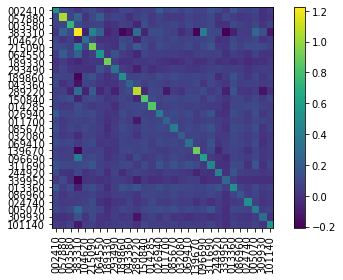

In [24]:
# 수익률의 공분산
from pypfopt import plotting

plotting.plot_covariance(S)

#### ver02> 종가에 결측값이 있는 종목을 삭제한 df2로 포트폴리오 구성 ( 22개 종목 )

In [25]:
# Calculate the expected annualized returns
# 복리 연평균 수익률
# return (1 + returns).prod() ** (frequency / returns.count()) - 1
mu2 = expected_returns.mean_historical_return(df2) 

# Calculate the annualized sample covariance matrix of the daily asset returns
S2 = risk_models.sample_cov(df2)

In [26]:
mu2

002410    0.697577
057880    0.157554
003580    0.114709
215090   -0.121315
064550    0.552052
189330    0.422897
189860    0.361153
043360    0.232085
150840   -0.317639
014285    0.738276
026940    0.398818
011700    0.183033
085670   -0.029235
032080    0.144957
069410    0.190517
139670    1.460737
096690   -0.234315
013360    0.459463
086960    0.085913
024740    0.498344
005070    0.212140
101140    0.129636
dtype: float64

In [27]:
len(mu2)

22

In [28]:
S2.shape

(22, 22)

In [29]:
len(S2)

22

In [30]:
S2

,002410,057880,003580,215090,064550,189330,189860,043360,150840,014285,026940,011700,085670,032080,069410,139670,096690,013360,086960,024740,005070,101140
002410,0.506272,0.104284,0.073518,0.120205,0.050143,0.003498,0.100245,0.095946,0.072617,0.069166,0.217182,0.092784,0.130887,0.082860,0.127176,0.070930,0.081973,0.181227,0.083446,0.067378,0.105551,0.052984
057880,0.104284,1.041847,0.077795,0.097855,0.214902,0.040231,0.081451,0.002059,0.105515,0.028112,0.077567,0.031144,0.038987,0.033084,0.080928,0.059687,0.060940,0.057351,0.017500,0.033988,0.058230,0.021762
003580,0.073518,0.077795,0.738959,0.061462,0.082480,-0.007854,0.075226,0.056795,0.135961,0.045840,0.085571,0.072788,0.090740,0.053528,0.102043,0.063548,0.061525,0.114629,0.066395,0.049279,0.099426,0.081625
215090,0.120205,0.097855,0.061462,0.928053,0.046743,0.024617,0.157138,0.076318,0.122191,0.035116,0.124241,0.087990,0.068277,0.075711,0.111685,0.063196,0.100481,0.138108,0.065642,0.128480,0.115659,0.068272
064550,0.050143,0.214902,0.082480,0.046743,0.540815,0.026586,0.047584,0.032498,0.082535,0.052961,0.055189,0.044920,0.059568,0.032104,0.016239,0.068293,0.060322,0.071513,0.031568,0.004470,0.080987,0.019591
189330,0.003498,0.040231,-0.007854,0.024617,0.026586,0.912287,-0.018435,-0.003033,0.025337,0.045613,0.008814,-0.004043,-0.019473,-0.004632,0.028615,-0.003647,0.006162,-0.021397,0.010256,-0.039423,-0.012669,0.028804
189860,0.100245,0.081451,0.075226,0.157138,0.047584,-0.018435,0.498926,0.066697,0.091528,0.078115,0.120154,0.088540,0.118704,0.083672,0.080183,0.085498,0.080823,0.147410,0.075584,0.025369,0.101835,0.060232
043360,0.095946,0.002059,0.056795,0.076318,0.032498,-0.003033,0.066697,0.231023,0.060988,0.093415,0.077671,0.061533,0.084390,0.063558,0.070768,0.097802,0.026145,0.106353,0.063979,0.070868,0.086366,0.043969
150840,0.072617,0.105515,0.135961,0.122191,0.082535,0.025337,0.091528,0.060988,0.839361,0.128209,0.071608,0.099882,0.103174,0.079163,0.095282,0.101852,0.032039,0.082070,0.093228,0.043319,0.100985,0.096662
014285,0.069166,0.028112,0.045840,0.035116,0.052961,0.045613,0.078115,0.093415,0.128209,0.847175,0.065399,0.066349,0.082744,0.077908,0.050803,0.071741,0.049223,0.091543,0.090684,0.104443,0.111914,0.054799


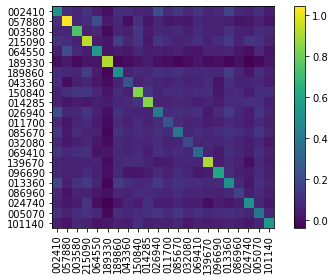

In [31]:
# 수익률의 공분산
from pypfopt import plotting

plotting.plot_covariance(S2)

# 포트폴리오 최적화 ( Efficient Risk )

#### ver01> 결측값 삭제하지 않음 / df / mu, S / ef, cleaned_weights ( 30개 종목 )

In [32]:
!pip install PyPortfolioOpt

In [33]:
import pypfopt
pypfopt.__version__

'1.4.2'

In [34]:
# Efficient_risk로 최적화 했을때의 결과 확인
vol_limit = 0.3
ef = EfficientFrontier(mu, S)
ef.efficient_risk(vol_limit)
ef.portfolio_performance(verbose=True)

Expected annual return: 3263.5%
Annual volatility: 30.0%
Sharpe Ratio: 108.72


(32.63518721884192, 0.2999999999877601, 108.71729073390868)

In [35]:
# max_sharpe로 최적화 했을때의 결과 확인
ef = EfficientFrontier(mu, S)
ef.max_sharpe()
ef.portfolio_performance(verbose=True)

Expected annual return: 4247.4%
Annual volatility: 38.0%
Sharpe Ratio: 111.86


(42.473647357315805, 0.3795254215886612, 111.85982530395049)

In [36]:
from pypfopt import risk_models, expected_returns
from pypfopt import EfficientFrontier, objective_functions
import cvxpy as cp

# Risk 범위 내에서 Return을 최대로 !
vol_limit = 0.3

ef = EfficientFrontier(mu, S)  # Create the Efficient Frontier Object

weights = ef.efficient_risk(vol_limit)

cleaned_weights = ef.clean_weights()
print(cleaned_weights)

# calculates the expected return, volatility and Sharpe ratio for the optimized portfolio.
ef.portfolio_performance(verbose=True)

OrderedDict([('002410', 0.0), ('057880', 0.0), ('003580', 0.0), ('383310', 0.29233), ('104620', 0.0513), ('215090', 0.0), ('064550', 0.0), ('189330', 0.03614), ('293490', 0.0), ('189860', 0.07293), ('043360', 0.14266), ('289220', 0.01341), ('150840', 0.0), ('014285', 0.0), ('026940', 0.0), ('011700', 0.0), ('085670', 0.0), ('032080', 0.0), ('069410', 0.0), ('139670', 0.04184), ('096690', 0.0), ('311690', 0.0), ('244920', 0.0), ('339950', 0.27763), ('013360', 0.0), ('086960', 0.0), ('024740', 0.0), ('005070', 0.0), ('309930', 0.0), ('101140', 0.07177)])
Expected annual return: 3263.5%
Annual volatility: 30.0%
Sharpe Ratio: 108.72


(32.63518721884192, 0.2999999999877601, 108.71729073390868)

In [37]:
weights

OrderedDict([('002410', 9.39265e-11),
             ('057880', 7.4666e-12),
             ('003580', 5.87613e-11),
             ('383310', 0.2923317967749936),
             ('104620', 0.0512962201792761),
             ('215090', 6.3628e-12),
             ('064550', 4.7085e-12),
             ('189330', 0.0361351057264618),
             ('293490', 4.402985e-10),
             ('189860', 0.0729323336592082),
             ('043360', 0.1426624466631387),
             ('289220', 0.01340569611929),
             ('150840', 8.469138e-10),
             ('014285', 4.43033e-11),
             ('026940', 4.63461e-11),
             ('011700', 6.79876e-11),
             ('085670', 6.10415e-11),
             ('032080', 2.972973e-10),
             ('069410', 5.71446e-11),
             ('139670', 0.0418429588752429),
             ('096690', 3.7366e-12),
             ('311690', 4.02623e-11),
             ('244920', 2.016816e-10),
             ('339950', 0.2776265158693154),
             ('013360', 1.4229e-10

In [38]:
len(weights)

30

In [39]:
cleaned_weights

OrderedDict([('002410', 0.0),
             ('057880', 0.0),
             ('003580', 0.0),
             ('383310', 0.29233),
             ('104620', 0.0513),
             ('215090', 0.0),
             ('064550', 0.0),
             ('189330', 0.03614),
             ('293490', 0.0),
             ('189860', 0.07293),
             ('043360', 0.14266),
             ('289220', 0.01341),
             ('150840', 0.0),
             ('014285', 0.0),
             ('026940', 0.0),
             ('011700', 0.0),
             ('085670', 0.0),
             ('032080', 0.0),
             ('069410', 0.0),
             ('139670', 0.04184),
             ('096690', 0.0),
             ('311690', 0.0),
             ('244920', 0.0),
             ('339950', 0.27763),
             ('013360', 0.0),
             ('086960', 0.0),
             ('024740', 0.0),
             ('005070', 0.0),
             ('309930', 0.0),
             ('101140', 0.07177)])

In [40]:
len(cleaned_weights)

30

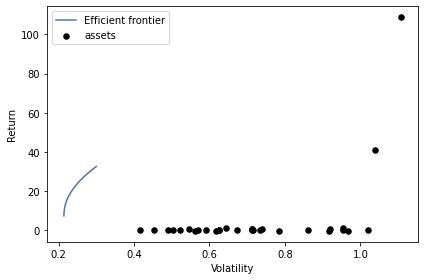

In [41]:
# 효율적 투자선와 각 종목의 수익률 & 변동성
import matplotlib.pyplot as plt

# ef = EfficientFrontier(mu, S, solver='SCS')

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.legend(loc='best')
plt.show()

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


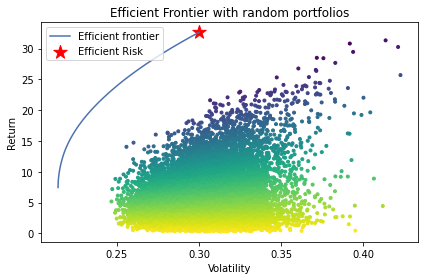

In [42]:
# Show Efficient Frontier
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio
vol_limit = 0.3
ef.efficient_risk(vol_limit)
ret_tangent, std_tangent, _ = ef.portfolio_performance()  # 기대수익률 , Risk(변동성)
ax.scatter(std_tangent, ret_tangent, marker="*", s=200, c="r", label="Efficient Risk")

# Generate random portfolios
n_samples = 20000
w = np.random.dirichlet(np.ones(len(mu)), n_samples) # 난수로 20000세트의 투자비중 만들기
rets = w.dot(mu)                                     # 기대수익률
stds = np.sqrt(np.diag(w @ S @ w.T))                 # Risk(변동성)
sharpes = rets / stds                                # 샤프비율

ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend(loc='best')
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

In [43]:
# Max.Sharpe Ratio로 최적화한 포트폴리오의 수익률과 변동성, 샤프비율
ef.portfolio_performance(verbose=True)

Expected annual return: 3263.5%
Annual volatility: 30.0%
Sharpe Ratio: 108.72


(32.63518718963089, 0.29999999977810343, 108.71729071251627)

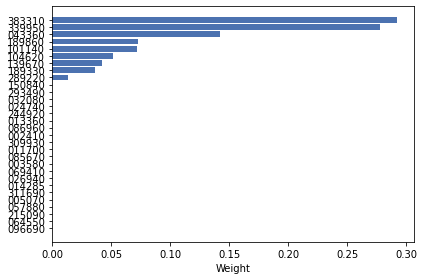

In [44]:
# 종목별 투자비중
plotting.plot_weights(weights, ax=None)

#### ver02> 결측값 삭제 / df2 / mu2, S2 / ef2, cleaned_weights2 ( 22개 종목 )

In [45]:
# Efficient_risk로 최적화 했을때의 결과 확인
vol_limit2 = 0.3
ef2 = EfficientFrontier(mu2, S2)
ef2.efficient_risk(vol_limit2)
ef2.portfolio_performance(verbose=True)

Expected annual return: 49.8%
Annual volatility: 30.0%
Sharpe Ratio: 1.59


(0.498351378887931, 0.30000000011401384, 1.594504595687118)

In [46]:
# max_sharpe로 최적화 했을때의 결과 확인
ef2 = EfficientFrontier(mu2, S2)
ef2.max_sharpe()
ef2.portfolio_performance(verbose=True)

Expected annual return: 84.2%
Annual volatility: 41.6%
Sharpe Ratio: 1.98


(0.8419022591086033, 0.4155378458006562, 1.9779239542549154)

In [47]:
# Risk 범위 내에서 Return을 최대로 !
vol_limit2 = 0.3
ef2 = EfficientFrontier(mu2, S2)  # Create the Efficient Frontier Object

weights2 = ef2.efficient_risk(vol_limit2)

cleaned_weights2 = ef2.clean_weights()
print(cleaned_weights2)

# calculates the expected return, volatility and Sharpe ratio for the optimized portfolio.
ef2.portfolio_performance(verbose=True)

OrderedDict([('002410', 0.062), ('057880', 0.00608), ('003580', 0.00785), ('215090', 0.0), ('064550', 0.10882), ('189330', 0.09273), ('189860', 0.04228), ('043360', 0.06754), ('150840', 0.0), ('014285', 0.04214), ('026940', 0.03131), ('011700', 0.08107), ('085670', 0.0), ('032080', 0.07684), ('069410', 0.0224), ('139670', 0.11456), ('096690', 0.0), ('013360', 0.01945), ('086960', 0.04935), ('024740', 0.12447), ('005070', 0.0), ('101140', 0.05112)])
Expected annual return: 49.8%
Annual volatility: 30.0%
Sharpe Ratio: 1.59


(0.498351378887931, 0.30000000011401384, 1.594504595687118)

In [48]:
weights2

OrderedDict([('002410', 0.0619990569677404),
             ('057880', 0.0060832653526758),
             ('003580', 0.0078450473494946),
             ('215090', 2.15027e-11),
             ('064550', 0.108815713752302),
             ('189330', 0.092730377755144),
             ('189860', 0.0422751643769045),
             ('043360', 0.0675404652389),
             ('150840', 1.41168e-11),
             ('014285', 0.0421394397253011),
             ('026940', 0.0313074553356884),
             ('011700', 0.0810703341751165),
             ('085670', 3.94816e-11),
             ('032080', 0.0768399017842031),
             ('069410', 0.022401447352599),
             ('139670', 0.1145586395020965),
             ('096690', 9.53663e-11),
             ('013360', 0.019445206176963),
             ('086960', 0.0493536217962167),
             ('024740', 0.1244735070263748),
             ('005070', 1.286527e-10),
             ('101140', 0.0511213560354885)])

In [49]:
len(weights2)

22

In [50]:
cleaned_weights2

OrderedDict([('002410', 0.062),
             ('057880', 0.00608),
             ('003580', 0.00785),
             ('215090', 0.0),
             ('064550', 0.10882),
             ('189330', 0.09273),
             ('189860', 0.04228),
             ('043360', 0.06754),
             ('150840', 0.0),
             ('014285', 0.04214),
             ('026940', 0.03131),
             ('011700', 0.08107),
             ('085670', 0.0),
             ('032080', 0.07684),
             ('069410', 0.0224),
             ('139670', 0.11456),
             ('096690', 0.0),
             ('013360', 0.01945),
             ('086960', 0.04935),
             ('024740', 0.12447),
             ('005070', 0.0),
             ('101140', 0.05112)])

In [51]:
len(cleaned_weights2)

22

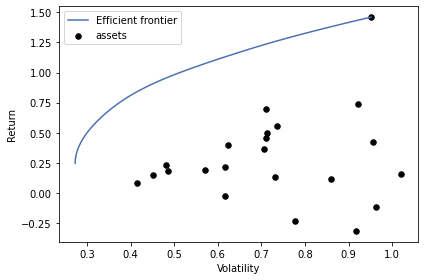

In [52]:
# 효율적 투자선와 각 종목의 수익률 & 변동성
import matplotlib.pyplot as plt

ef2 = EfficientFrontier(mu2, S2, solver='SCS')

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef2, ax=ax, show_assets=True)
plt.legend(loc='best')
plt.show()

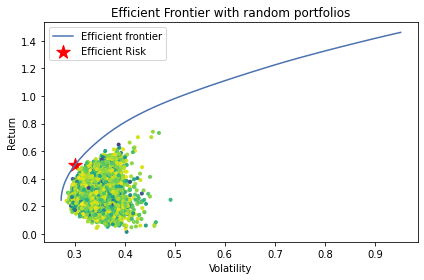

In [53]:
# Show Efficient Frontier
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef2, ax=ax, show_assets=False)

# Find the tangency portfolio
vol_limit2 = 0.3
ef2.efficient_risk(vol_limit2)
ret_tangent2, std_tangent2, _ = ef2.portfolio_performance()  # 기대수익률 , Risk(변동성)
ax.scatter(std_tangent2, ret_tangent2, marker="*", s=200, c="r", label="Efficient Risk")

# Generate random portfolios
n_samples = 20000
w2 = np.random.dirichlet(np.ones(len(mu2)), n_samples) # 난수로 20000세트의 투자비중 만들기
rets2 = w2.dot(mu2)                                     # 기대수익률
stds2 = np.sqrt(np.diag(w2 @ S2 @ w2.T))                 # Risk(변동성)
sharpes2 = rets2 / stds2                                # 샤프비율

ax.scatter(stds2, rets2, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend(loc='best')
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

In [54]:
# Efficient Risk로 최적화한 포트폴리오의 수익률과 변동성, 샤프비율
ef2.portfolio_performance(verbose=True)

Expected annual return: 49.8%
Annual volatility: 30.0%
Sharpe Ratio: 1.59


(0.4984798450808989, 0.3000279387760388, 1.5947842958654217)

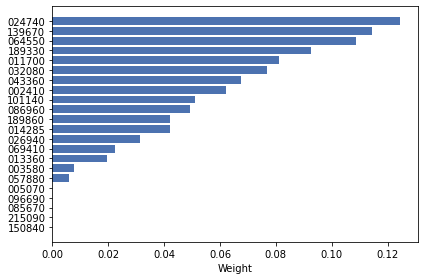

In [55]:
# 종목별 투자비중
plotting.plot_weights(weights2, ax=None)

### 투자금액과 포트폴리오의 비중에 맞추어 수량 할당

In [56]:
!pip install pulp

     |████████████████████████████████| 40.6 MB 32 kB/s 


#### ver01> 결측값 삭제하지 않음 / df / mu, S / ef, cleaned_weights ( 30개 종목 )

In [57]:
# Get the discrete allocation of each sharpe per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

# 투자금액 (단위: KRW)
portfolio_val = 15000000

latest_prices = get_latest_prices(df)

weights = cleaned_weights

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=portfolio_val)

allocation, leftover = da.lp_portfolio(verbose=False)

print('Discrete Allocaion: ', allocation)
print('Funds Remaining: ', leftover, ' KRW')

rmse = da._allocation_rmse_error(verbose=False)

Discrete Allocaion:  {'383310': 56, '104620': 73, '189330': 6, '189860': 97, '043360': 369, '289220': 2, '139670': 23, '339950': 1067, '101140': 238}
Funds Remaining:  64.0  KRW
Allocation has RMSE: 0.001


In [58]:
allocation

{'043360': 369,
 '101140': 238,
 '104620': 73,
 '139670': 23,
 '189330': 6,
 '189860': 97,
 '289220': 2,
 '339950': 1067,
 '383310': 56}

In [59]:
len(allocation)

9

#### ver02> 결측값 삭제하지 않음 / df2 / mu2, S2 / ef2, cleaned_weights2 /  ( 22개 종목 )

In [60]:
# Get the discrete allocation of each sharpe per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

# 투자금액 (단위: KRW)
portfolio_val = 15000000

latest_prices2 = get_latest_prices(df2)

weights2 = cleaned_weights2

da2 = DiscreteAllocation(weights2, latest_prices2, total_portfolio_value=portfolio_val)

allocation2, leftover2 = da2.lp_portfolio(verbose=False)

print('Discrete Allocaion: ', allocation2)
print('Funds Remaining: ', leftover2, ' KRW')

rmse2 = da2._allocation_rmse_error(verbose=False)

Discrete Allocaion:  {'002410': 114, '057880': 32, '003580': 6, '064550': 46, '189330': 16, '189860': 56, '043360': 174, '014285': 17, '026940': 68, '011700': 287, '032080': 393, '069410': 23, '139670': 65, '013360': 73, '086960': 29, '024740': 367, '101140': 169}
Funds Remaining:  470.0  KRW
Allocation has RMSE: 0.000


In [61]:
allocation2

{'002410': 114,
 '003580': 6,
 '011700': 287,
 '013360': 73,
 '014285': 17,
 '024740': 367,
 '026940': 68,
 '032080': 393,
 '043360': 174,
 '057880': 32,
 '064550': 46,
 '069410': 23,
 '086960': 29,
 '101140': 169,
 '139670': 65,
 '189330': 16,
 '189860': 56}

In [62]:
len(allocation2)

17

### 포트폴리오 결과로 보여줄 변수 저장

#### ver01> 결측값 삭제하지 않음 ( 30개 종목 )

In [63]:
# 각 종목별 실제 투자 금액
inv_total_price = {}

for i in allocation.keys():
  inv_total_price[i] = latest_prices.loc[i]*allocation[i]
inv_total_price

{'043360': 2140200.0,
 '101140': 1076950.0,
 '104620': 769931.0,
 '139670': 611800.0,
 '189330': 514800.0,
 '189860': 1096100.0,
 '289220': 190000.0,
 '339950': 4166635.0,
 '383310': 4433520.0}

In [64]:
# 총 투자금액
investment = 0

for i in inv_total_price.values():
    investment += i
print(investment)

14999936.0


In [65]:
portfolio_val-leftover

14999936.0

In [66]:
# 각 종목별 실제 투자 비중
inv_total_weight = {}

for i in allocation.keys():
  inv_total_weight[i] = inv_total_price[i]/investment
inv_total_weight

{'043360': 0.14268060877059743,
 '101140': 0.07179697300041814,
 '104620': 0.051328952336863305,
 '139670': 0.04078684069052028,
 '189330': 0.03432014643262478,
 '189860': 0.07307364511421915,
 '289220': 0.012666720711341702,
 '339950': 0.27777685184790124,
 '383310': 0.295569261095514}

In [67]:
# 투자비중의 합계
investment_w = 0

for i in inv_total_weight.values():
    investment_w += i
print(investment_w)

1.0


In [68]:
# 결과값으로 불러올 값을 리스트로 저장
name_list = []                    # 종목명(회사이름)
total_price_stock =[]             # 각 종목별 실제 투자 금액
total_weight_stock = []           # 각 종목별 실제 투자 비중

for i in allocation.keys(): # i = 포트폴리오에 할당된 종목의 종목코드
    name_list.append(code_name_dict.get(i))
    total_price_stock.append(inv_total_price.get(i))
    total_weight_stock.append(inv_total_weight.get(i))

In [69]:
name_list

['에코프로에이치엔',
 '노랑풍선',
 '씨이랩',
 '서전기전',
 '디지아이',
 '자이언트스텝',
 '키네마스터',
 '아이비김영',
 '인바이오젠']

In [70]:
total_price_stock

[4433520.0,
 769931.0,
 514800.0,
 1096100.0,
 2140200.0,
 190000.0,
 611800.0,
 4166635.0,
 1076950.0]

In [71]:
total_weight_stock

[0.295569261095514,
 0.051328952336863305,
 0.03432014643262478,
 0.07307364511421915,
 0.14268060877059743,
 0.012666720711341702,
 0.04078684069052028,
 0.27777685184790124,
 0.07179697300041814]

In [72]:
# Get the discrete allocation values
discrete_allocation_list = []
for symbol in allocation:
  discrete_allocation_list.append(allocation.get(symbol))

In [73]:
discrete_allocation_list

[56, 73, 6, 97, 369, 2, 23, 1067, 238]

In [74]:
# Create a dataframe for the portfolio
portfolio_df = pd.DataFrame(columns = ['종목명','종목코드','수량(주)', '투자금액(원)','투자비중'])
portfolio_df

,종목명,종목코드,수량(주),투자금액(원),투자비중


In [75]:
# portfolio_df['Company_name'] = company_name
portfolio_df['종목명'] = name_list
portfolio_df['종목코드'] = allocation
portfolio_df['수량(주)'] = discrete_allocation_list
portfolio_df['투자금액(원)'] = total_price_stock
portfolio_df['투자비중'] = total_weight_stock

In [76]:
portfolio_df

,종목명,종목코드,수량(주),투자금액(원),투자비중
0,에코프로에이치엔,383310,56,4433520.0,0.295569
1,노랑풍선,104620,73,769931.0,0.051329
2,씨이랩,189330,6,514800.0,0.034320
3,서전기전,189860,97,1096100.0,0.073074
4,디지아이,043360,369,2140200.0,0.142681
5,자이언트스텝,289220,2,190000.0,0.012667
6,키네마스터,139670,23,611800.0,0.040787
7,아이비김영,339950,1067,4166635.0,0.277777
8,인바이오젠,101140,238,1076950.0,0.071797


In [77]:
# Sort by allocation & Show the portfolio
portfolio_df_sorted = portfolio_df.sort_values('투자비중', ascending = False)
portfolio_df_sorted = portfolio_df_sorted.reset_index(drop=True)
portfolio_df_sorted

,종목명,종목코드,수량(주),투자금액(원),투자비중
0,에코프로에이치엔,383310,56,4433520.0,0.295569
1,아이비김영,339950,1067,4166635.0,0.277777
2,디지아이,043360,369,2140200.0,0.142681
3,서전기전,189860,97,1096100.0,0.073074
4,인바이오젠,101140,238,1076950.0,0.071797
5,노랑풍선,104620,73,769931.0,0.051329
6,키네마스터,139670,23,611800.0,0.040787
7,씨이랩,189330,6,514800.0,0.034320
8,자이언트스텝,289220,2,190000.0,0.012667


### 투자 금액에 따라 최적화된 포트폴리오의 종목별 수량

In [78]:
portfolio_df_sorted.loc["합계",2:] = portfolio_df_sorted.sum()
portfolio_df_sorted

,종목명,종목코드,수량(주),투자금액(원),투자비중
0,에코프로에이치엔,383310,56.0,4433520.0,0.295569
1,아이비김영,339950,1067.0,4166635.0,0.277777
2,디지아이,043360,369.0,2140200.0,0.142681
3,서전기전,189860,97.0,1096100.0,0.073074
4,인바이오젠,101140,238.0,1076950.0,0.071797
5,노랑풍선,104620,73.0,769931.0,0.051329
6,키네마스터,139670,23.0,611800.0,0.040787
7,씨이랩,189330,6.0,514800.0,0.034320
8,자이언트스텝,289220,2.0,190000.0,0.012667
합계,NaN,NaN,1931.0,14999936.0,1.000000


#### ver02> 결측값 삭제 ( 22개 종목 )

In [79]:
# 각 종목별 실제 투자 금액
inv_total_price2 = {}

for i in allocation2.keys():
  inv_total_price2[i] = latest_prices2.loc[i]*allocation2[i]
inv_total_price2

{'002410': 933660,
 '003580': 118800,
 '011700': 1216880,
 '013360': 290905,
 '014285': 644300,
 '024740': 1868030,
 '026940': 465800,
 '032080': 1151490,
 '043360': 1009200,
 '057880': 92640,
 '064550': 1644500,
 '069410': 334650,
 '086960': 729350,
 '101140': 764725,
 '139670': 1729000,
 '189330': 1372800,
 '189860': 632800}

In [80]:
# 총 투자금액
investment2 = 0

for i in inv_total_price2.values():
    investment2 += i
print(investment2)

14999530


In [81]:
portfolio_val-leftover2

14999530.0

In [82]:
# 각 종목별 실제 투자 비중
inv_total_weight2 = {}

for i in allocation2.keys():
  inv_total_weight2[i] = inv_total_price2[i]/investment2
inv_total_weight2

{'002410': 0.06224595037311169,
 '003580': 0.007920248167775923,
 '011700': 0.08112787534009398,
 '013360': 0.019394274353929757,
 '014285': 0.042954679246616397,
 '024740': 0.1245392355627143,
 '026940': 0.031054306368266206,
 '032080': 0.07676840541003618,
 '043360': 0.06728210817272275,
 '057880': 0.0061761935207303165,
 '064550': 0.10963676861875006,
 '069410': 0.022310699068570816,
 '086960': 0.04862485691218325,
 '101140': 0.050983264142276455,
 '139670': 0.11527027846872535,
 '189330': 0.09152286771652178,
 '189860': 0.04218798855697479}

In [83]:
# 투자비중의 합계
investment_w2 = 0

for i in inv_total_weight2.values():
    investment_w2 += i
print(investment_w2)

1.0


In [84]:
# 결과값으로 불러올 값을 리스트로 저장
name_list2 = []                    # 종목명(회사이름)
total_price_stock2 =[]             # 각 종목별 실제 투자 금액
total_weight_stock2 = []           # 각 종목별 실제 투자 비중

for i in allocation2.keys(): # i = 포트폴리오에 할당된 종목의 종목코드
    name_list2.append(code_name_dict.get(i))
    total_price_stock2.append(inv_total_price2.get(i))
    total_weight_stock2.append(inv_total_weight2.get(i))

In [85]:
name_list2

['범양건영',
 '피에이치씨',
 '넥스트사이언스',
 '바이오니아',
 '씨이랩',
 '서전기전',
 '디지아이',
 '금강공업우',
 '부국철강',
 '한신기계',
 '아즈텍WB',
 '엔텔스',
 '키네마스터',
 '일성건설',
 '한컴MDS',
 '한일단조',
 '인바이오젠']

In [86]:
total_price_stock2

[933660,
 92640,
 118800,
 1644500,
 1372800,
 632800,
 1009200,
 644300,
 465800,
 1216880,
 1151490,
 334650,
 1729000,
 290905,
 729350,
 1868030,
 764725]

In [87]:
total_weight_stock2

[0.06224595037311169,
 0.0061761935207303165,
 0.007920248167775923,
 0.10963676861875006,
 0.09152286771652178,
 0.04218798855697479,
 0.06728210817272275,
 0.042954679246616397,
 0.031054306368266206,
 0.08112787534009398,
 0.07676840541003618,
 0.022310699068570816,
 0.11527027846872535,
 0.019394274353929757,
 0.04862485691218325,
 0.1245392355627143,
 0.050983264142276455]

In [88]:
# Get the discrete allocation values
discrete_allocation_list2 = []
for symbol in allocation2:
  discrete_allocation_list2.append(allocation2.get(symbol))

In [89]:
discrete_allocation_list2

[114, 32, 6, 46, 16, 56, 174, 17, 68, 287, 393, 23, 65, 73, 29, 367, 169]

In [90]:
# Create a dataframe for the portfolio
portfolio_df2 = pd.DataFrame(columns = ['종목명','종목코드','수량(주)', '투자금액(원)','투자비중'])
portfolio_df2

,종목명,종목코드,수량(주),투자금액(원),투자비중


In [91]:
# portfolio_df['Company_name'] = company_name
portfolio_df2['종목명'] = name_list2
portfolio_df2['종목코드'] = allocation2
portfolio_df2['수량(주)'] = discrete_allocation_list2
portfolio_df2['투자금액(원)'] = total_price_stock2
portfolio_df2['투자비중'] = total_weight_stock2

In [92]:
portfolio_df2

,종목명,종목코드,수량(주),투자금액(원),투자비중
0,범양건영,002410,114,933660,0.062246
1,피에이치씨,057880,32,92640,0.006176
2,넥스트사이언스,003580,6,118800,0.007920
3,바이오니아,064550,46,1644500,0.109637
4,씨이랩,189330,16,1372800,0.091523
5,서전기전,189860,56,632800,0.042188
6,디지아이,043360,174,1009200,0.067282
7,금강공업우,014285,17,644300,0.042955
8,부국철강,026940,68,465800,0.031054
9,한신기계,011700,287,1216880,0.081128


In [93]:
# Sort by allocation & Show the portfolio
portfolio_df_sorted2 = portfolio_df2.sort_values('투자비중', ascending = False)
portfolio_df_sorted2 = portfolio_df_sorted2.reset_index(drop=True)
portfolio_df_sorted2

,종목명,종목코드,수량(주),투자금액(원),투자비중
0,한일단조,024740,367,1868030,0.124539
1,키네마스터,139670,65,1729000,0.115270
2,바이오니아,064550,46,1644500,0.109637
3,씨이랩,189330,16,1372800,0.091523
4,한신기계,011700,287,1216880,0.081128
5,아즈텍WB,032080,393,1151490,0.076768
6,디지아이,043360,174,1009200,0.067282
7,범양건영,002410,114,933660,0.062246
8,인바이오젠,101140,169,764725,0.050983
9,한컴MDS,086960,29,729350,0.048625


### 투자 금액에 따라 최적화된 포트폴리오의 종목별 수량

In [94]:
portfolio_df_sorted2.loc["합계",2:] = portfolio_df_sorted2.sum()
portfolio_df_sorted2

,종목명,종목코드,수량(주),투자금액(원),투자비중
0,한일단조,024740,367.0,1868030.0,0.124539
1,키네마스터,139670,65.0,1729000.0,0.115270
2,바이오니아,064550,46.0,1644500.0,0.109637
3,씨이랩,189330,16.0,1372800.0,0.091523
4,한신기계,011700,287.0,1216880.0,0.081128
5,아즈텍WB,032080,393.0,1151490.0,0.076768
6,디지아이,043360,174.0,1009200.0,0.067282
7,범양건영,002410,114.0,933660.0,0.062246
8,인바이오젠,101140,169.0,764725.0,0.050983
9,한컴MDS,086960,29.0,729350.0,0.048625


# 포트폴리오의 수익률과 변동성을 벤치마크지수(KOSPI)와 비교

#### ver01> 결측값 삭제 ( 30개 종목 )

In [95]:
df

,002410,057880,003580,383310,104620,215090,064550,189330,293490,189860,043360,289220,150840,014285,026940,011700,085670,032080,069410,139670,096690,311690,244920,339950,013360,086960,024740,005070,309930,101140
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,1735,1885,14400,NaN,NaN,3032,9850,30500,NaN,4575,3145,NaN,12300,7490,2560,2590,3600,1970,8725,1897,3435,NaN,NaN,NaN,1315,19750,1555,24431,NaN,3165
2018-07-20,1750,1945,12000,NaN,NaN,3052,9880,30200,NaN,4400,3520,NaN,12300,7380,2540,2520,3520,1900,8691,1889,3097,NaN,NaN,NaN,1275,19800,1550,23888,NaN,2805
2018-07-23,1620,1801,9310,NaN,NaN,2909,9080,30000,NaN,4080,3395,NaN,11550,6760,2440,2250,3380,1840,8523,1865,2914,NaN,NaN,NaN,1195,18900,1440,22440,NaN,2630
2018-07-24,1665,1810,9990,NaN,NaN,3110,9110,30300,NaN,4400,3340,NaN,11600,7170,2585,2300,3510,1865,8388,1858,2914,NaN,NaN,NaN,1290,19100,1460,23164,NaN,2720
2018-07-25,1650,1638,10500,NaN,NaN,3039,8990,30300,NaN,4250,3320,NaN,11500,7170,2570,2285,3470,1830,8219,1852,2914,NaN,NaN,NaN,1255,18750,1400,23164,NaN,2630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,9500,2560,16850,47417.0,10213.0,1740,33000,81800,83100.0,11450,4360,76000.0,3720,22850,7040,3060,3095,3025,16200,30200,1252,39900.0,11000.0,4445.0,4110,22200,4580,32500,3870.0,4675
2021-07-14,8900,2662,17400,50569.0,10263.0,1750,33300,85000,81200.0,10800,5660,82600.0,3385,29700,7050,3035,3250,3025,15300,28550,1252,40600.0,11150.0,4210.0,4080,21400,5300,37450,4435.0,4685
2021-07-15,8860,2602,17850,50044.0,10614.0,1710,30550,84700,81200.0,11100,6480,82600.0,3925,34500,7050,3945,3115,3000,15450,28300,1230,39800.0,11100.0,4350.0,4110,23200,5400,37400,5760.0,4910


In [96]:
cleaned_weights

OrderedDict([('002410', 0.0),
             ('057880', 0.0),
             ('003580', 0.0),
             ('383310', 0.29233),
             ('104620', 0.0513),
             ('215090', 0.0),
             ('064550', 0.0),
             ('189330', 0.03614),
             ('293490', 0.0),
             ('189860', 0.07293),
             ('043360', 0.14266),
             ('289220', 0.01341),
             ('150840', 0.0),
             ('014285', 0.0),
             ('026940', 0.0),
             ('011700', 0.0),
             ('085670', 0.0),
             ('032080', 0.0),
             ('069410', 0.0),
             ('139670', 0.04184),
             ('096690', 0.0),
             ('311690', 0.0),
             ('244920', 0.0),
             ('339950', 0.27763),
             ('013360', 0.0),
             ('086960', 0.0),
             ('024740', 0.0),
             ('005070', 0.0),
             ('309930', 0.0),
             ('101140', 0.07177)])

In [97]:
len(cleaned_weights)

30

In [98]:
# 각 일자별, 종목별 종가에 해당 weights를 곱해주기
for i, weight in cleaned_weights.items():
    df[i] = df[i]*weight

In [99]:
df

,002410,057880,003580,383310,104620,215090,064550,189330,293490,189860,043360,289220,150840,014285,026940,011700,085670,032080,069410,139670,096690,311690,244920,339950,013360,086960,024740,005070,309930,101140
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1102.270,NaN,333.65475,448.6657,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.37048,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,227.15205
2018-07-20,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1091.428,NaN,320.89200,502.1632,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.03576,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,201.31485
2018-07-23,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1084.200,NaN,297.55440,484.3307,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.03160,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,188.75510
2018-07-24,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1095.042,NaN,320.89200,476.4844,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.73872,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,195.21440
2018-07-25,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1095.042,NaN,309.95250,473.6312,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.48768,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,188.75510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,0.0,0.0,0.0,13861.41161,523.9269,0.0,0.0,2956.252,0.0,835.04850,621.9976,1019.160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1263.56800,0.0,0.0,0.0,1234.06535,0.0,0.0,0.0,0.0,0.0,335.52475
2021-07-14,0.0,0.0,0.0,14782.83577,526.4919,0.0,0.0,3071.900,0.0,787.64400,807.4556,1107.666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1194.53200,0.0,0.0,0.0,1168.82230,0.0,0.0,0.0,0.0,0.0,336.24245
2021-07-15,0.0,0.0,0.0,14629.36252,544.4982,0.0,0.0,3061.058,0.0,809.52300,924.4368,1107.666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1184.07200,0.0,0.0,0.0,1207.69050,0.0,0.0,0.0,0.0,0.0,352.39070


In [100]:
# 일자별 종목의 (종가*비중) 합계를 Port열에 저장
df['Port'] = df.sum(axis = 1)
df

,002410,057880,003580,383310,104620,215090,064550,189330,293490,189860,043360,289220,150840,014285,026940,011700,085670,032080,069410,139670,096690,311690,244920,339950,013360,086960,024740,005070,309930,101140,Port
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1102.270,NaN,333.65475,448.6657,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.37048,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,227.15205,2191.11298
2018-07-20,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1091.428,NaN,320.89200,502.1632,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.03576,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,201.31485,2194.83381
2018-07-23,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1084.200,NaN,297.55440,484.3307,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.03160,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,188.75510,2132.87180
2018-07-24,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1095.042,NaN,320.89200,476.4844,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.73872,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,195.21440,2165.37152
2018-07-25,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1095.042,NaN,309.95250,473.6312,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.48768,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,188.75510,2144.86848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,0.0,0.0,0.0,13861.41161,523.9269,0.0,0.0,2956.252,0.0,835.04850,621.9976,1019.160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1263.56800,0.0,0.0,0.0,1234.06535,0.0,0.0,0.0,0.0,0.0,335.52475,22650.95471
2021-07-14,0.0,0.0,0.0,14782.83577,526.4919,0.0,0.0,3071.900,0.0,787.64400,807.4556,1107.666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1194.53200,0.0,0.0,0.0,1168.82230,0.0,0.0,0.0,0.0,0.0,336.24245,23783.59002
2021-07-15,0.0,0.0,0.0,14629.36252,544.4982,0.0,0.0,3061.058,0.0,809.52300,924.4368,1107.666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1184.07200,0.0,0.0,0.0,1207.69050,0.0,0.0,0.0,0.0,0.0,352.39070,23820.69772


In [101]:
# 일자별 종가의 전일대비 변동률(수익률)을 portfolio라는 데이터프레임으로 저장
portfolio = df[['Port']].pct_change()
portfolio

,Port
Date,
2018-07-19,NaN
2018-07-20,0.001698
2018-07-23,-0.028231
2018-07-24,0.015238
2018-07-25,-0.009469
...,...
2021-07-13,0.047890
2021-07-14,0.050004
2021-07-15,0.001560


In [102]:
# 코스피지수 불러오기
kospi = fdr.DataReader('KS11', start_date, end_date)[['Close']]
kospi

,Close
Date,
2018-07-19,2282.29
2018-07-20,2289.19
2018-07-23,2269.31
2018-07-24,2280.20
2018-07-25,2273.03
...,...
2021-07-13,3271.38
2021-07-14,3264.81
2021-07-15,3286.22


In [103]:
# 코스피지수의 변동률(수익률) 구하기
# 변동률(수익률) = (당일가격-전일가격) / 전일가격
# 7/20의 변동률(수익률) = (7/20 가격-7-19 가격) / 7/19 가격
kospi_pct = kospi.pct_change()
kospi_pct

,Close
Date,
2018-07-19,NaN
2018-07-20,0.003023
2018-07-23,-0.008684
2018-07-24,0.004799
2018-07-25,-0.003144
...,...
2021-07-13,0.007673
2021-07-14,-0.002008
2021-07-15,0.006558


In [104]:
# 코스피와 포트폴리오 합치기
result = kospi_pct.join(portfolio)
result

,Close,Port
Date,,
2018-07-19,NaN,NaN
2018-07-20,0.003023,0.001698
2018-07-23,-0.008684,-0.028231
2018-07-24,0.004799,0.015238
2018-07-25,-0.003144,-0.009469
...,...,...
2021-07-13,0.007673,0.047890
2021-07-14,-0.002008,0.050004
2021-07-15,0.006558,0.001560


In [105]:
# 1열을 0으로 
result.iloc[0] = 0
result

,Close,Port
Date,,
2018-07-19,0.000000,0.000000
2018-07-20,0.003023,0.001698
2018-07-23,-0.008684,-0.028231
2018-07-24,0.004799,0.015238
2018-07-25,-0.003144,-0.009469
...,...,...
2021-07-13,0.007673,0.047890
2021-07-14,-0.002008,0.050004
2021-07-15,0.006558,0.001560


In [106]:
# 열 이름 변경
result.columns = ['KOSPI', 'PORTFOLIO']
result

,KOSPI,PORTFOLIO
Date,,
2018-07-19,0.000000,0.000000
2018-07-20,0.003023,0.001698
2018-07-23,-0.008684,-0.028231
2018-07-24,0.004799,0.015238
2018-07-25,-0.003144,-0.009469
...,...,...
2021-07-13,0.007673,0.047890
2021-07-14,-0.002008,0.050004
2021-07-15,0.006558,0.001560


In [107]:
# 1에서 시작해서, 전일대비 변동률(수익률)을 적용하여 수치화하기
wealth = (1+result).cumprod()
wealth

,KOSPI,PORTFOLIO
Date,,
2018-07-19,1.000000,1.000000
2018-07-20,1.003023,1.001698
2018-07-23,0.994313,0.973419
2018-07-24,0.999084,0.988252
2018-07-25,0.995943,0.978895
...,...,...
2021-07-13,1.433376,10.337648
2021-07-14,1.430497,10.854570
2021-07-15,1.439878,10.871506


## 시각화

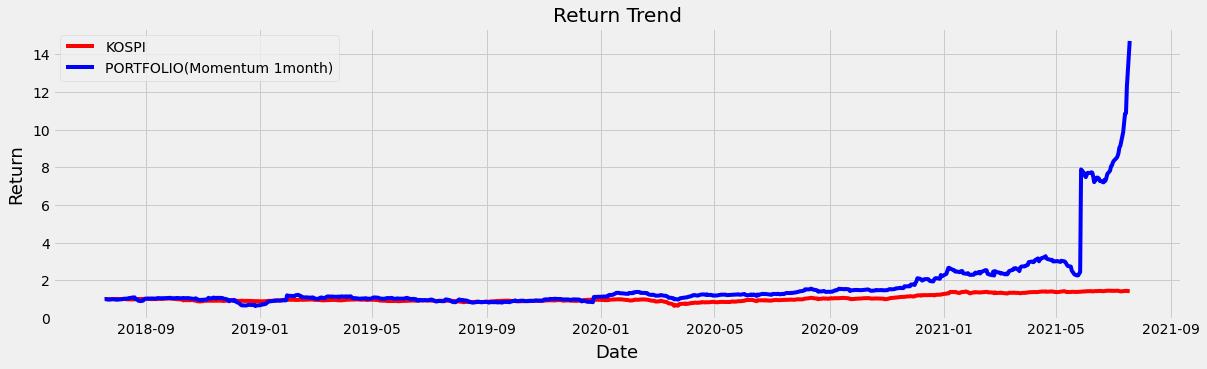

In [110]:
# 포트폴리오와 KOSPI 지수의 '누적 수익률 추이'를 시각화하여 비교

# matplotlib.pyplot 스타일시트 설정
plt.style.use('fivethirtyeight')

plt.figure(figsize=(18,5))
plt.plot(wealth.index, wealth.KOSPI , 'r', label='KOSPI')
plt.plot(wealth.index, wealth.PORTFOLIO ,'b', label="PORTFOLIO(Momentum 1month)")
plt.grid(True)
plt.title('Return Trend')
plt.xlabel('Date',fontsize=18, labelpad=7)
plt.ylabel('Return',fontsize=18, labelpad=7)
plt.legend(loc='best')
plt.show()

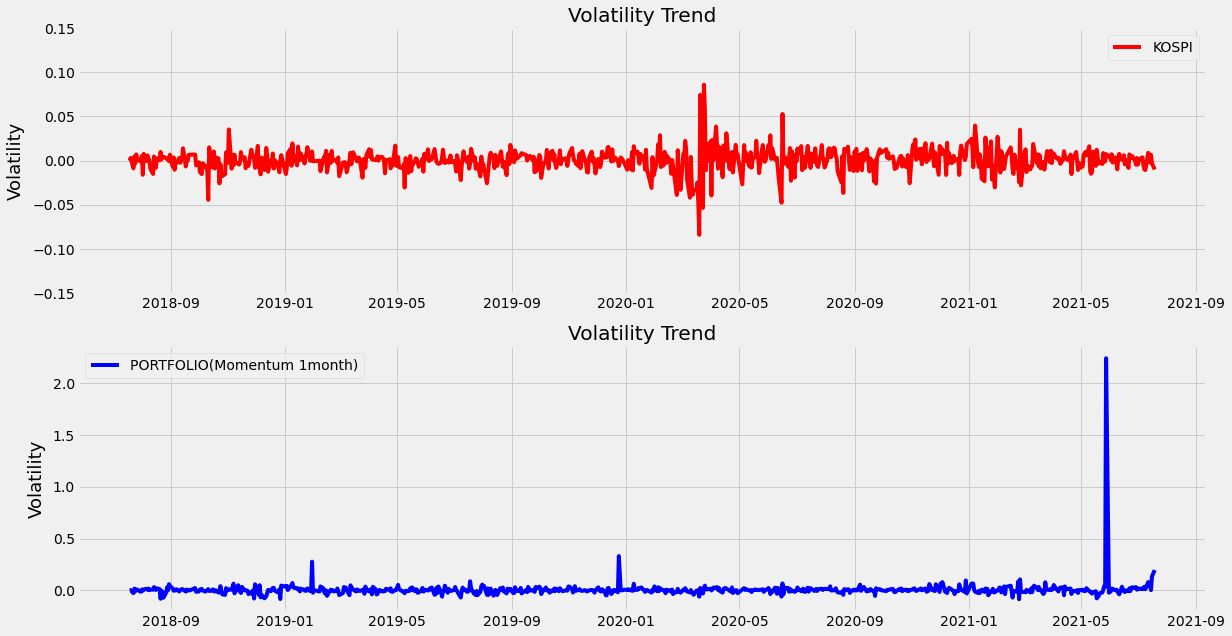

In [111]:
# 변동률 비교
plt.figure(figsize=(18,10))

plt.subplot(2,1,1)
plt.title('Volatility Trend')

plt.plot(result.index, result.KOSPI , 'r', label='KOSPI')
plt.yticks([-0.15, -0.10, -0.05, 0.00, 0.05, 0.10, 0.15])
plt.grid(True)
plt.ylabel('Volatility',fontsize=18, labelpad=7)
plt.legend(loc='best')

plt.subplot(2,1,2)
plt.title('Volatility Trend')
plt.plot(result.index, result.PORTFOLIO ,'b', label="PORTFOLIO(Momentum 1month)")
# plt.yticks([-0.15, -0.10, -0.05, 0.00, 0.05, 0.10, 0.15])
plt.ylabel('Volatility',fontsize=18, labelpad=7)
plt.legend(loc='best')

plt.grid(True)
plt.show()

In [112]:
print('----- Momentum 1month portfolio performance -----')
# Show Risk Limit
print('Risk limit: ', vol_limit)

# Show Funds
print('Funds:', portfolio_val, 'KRW')

# Show Funds Remaining
print('Funds Remaining: ', leftover, ' KRW')

# Show Portfolio performance
ef.portfolio_performance(verbose=True)
rmse = da._allocation_rmse_error(verbose=False)

----- Momentum 1month portfolio performance -----
Risk limit:  0.3
Funds: 15000000 KRW
Funds Remaining:  64.0  KRW
Expected annual return: 3263.5%
Annual volatility: 30.0%
Sharpe Ratio: 108.72
Allocation has RMSE: 0.001


#### ver02> 결측값 삭제 ( 22개 종목 )

In [113]:
df2

,002410,057880,003580,215090,064550,189330,189860,043360,150840,014285,026940,011700,085670,032080,069410,139670,096690,013360,086960,024740,005070,101140
Date,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,1735,1885,14400,3032,9850,30500,4575,3145,12300,7490,2560,2590,3600,1970,8725,1897,3435,1315,19750,1555,24431,3165
2018-07-20,1750,1945,12000,3052,9880,30200,4400,3520,12300,7380,2540,2520,3520,1900,8691,1889,3097,1275,19800,1550,23888,2805
2018-07-23,1620,1801,9310,2909,9080,30000,4080,3395,11550,6760,2440,2250,3380,1840,8523,1865,2914,1195,18900,1440,22440,2630
2018-07-24,1665,1810,9990,3110,9110,30300,4400,3340,11600,7170,2585,2300,3510,1865,8388,1858,2914,1290,19100,1460,23164,2720
2018-07-25,1650,1638,10500,3039,8990,30300,4250,3320,11500,7170,2570,2285,3470,1830,8219,1852,2914,1255,18750,1400,23164,2630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,9500,2560,16850,1740,33000,81800,11450,4360,3720,22850,7040,3060,3095,3025,16200,30200,1252,4110,22200,4580,32500,4675
2021-07-14,8900,2662,17400,1750,33300,85000,10800,5660,3385,29700,7050,3035,3250,3025,15300,28550,1252,4080,21400,5300,37450,4685
2021-07-15,8860,2602,17850,1710,30550,84700,11100,6480,3925,34500,7050,3945,3115,3000,15450,28300,1230,4110,23200,5400,37400,4910


In [114]:
cleaned_weights2

OrderedDict([('002410', 0.062),
             ('057880', 0.00608),
             ('003580', 0.00785),
             ('215090', 0.0),
             ('064550', 0.10882),
             ('189330', 0.09273),
             ('189860', 0.04228),
             ('043360', 0.06754),
             ('150840', 0.0),
             ('014285', 0.04214),
             ('026940', 0.03131),
             ('011700', 0.08107),
             ('085670', 0.0),
             ('032080', 0.07684),
             ('069410', 0.0224),
             ('139670', 0.11456),
             ('096690', 0.0),
             ('013360', 0.01945),
             ('086960', 0.04935),
             ('024740', 0.12447),
             ('005070', 0.0),
             ('101140', 0.05112)])

In [115]:
len(cleaned_weights2)

22

In [116]:
# 각 일자별, 종목별 종가에 해당 weights를 곱해주기
for i, weight in cleaned_weights2.items():
    df2[i] = df2[i]*weight

In [117]:
df2

,002410,057880,003580,215090,064550,189330,189860,043360,150840,014285,026940,011700,085670,032080,069410,139670,096690,013360,086960,024740,005070,101140
Date,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,107.57,11.46080,113.0400,0.0,1071.8770,2828.265,193.4310,212.4133,0.0,315.6286,80.15360,209.97130,0.0,151.3748,195.4400,217.32032,0.0,25.57675,974.6625,193.55085,0.0,161.7948
2018-07-20,108.50,11.82560,94.2000,0.0,1075.1416,2800.446,186.0320,237.7408,0.0,310.9932,79.52740,204.29640,0.0,145.9960,194.6784,216.40384,0.0,24.79875,977.1300,192.92850,0.0,143.3916
2018-07-23,100.44,10.95008,73.0835,0.0,988.0856,2781.900,172.5024,229.2983,0.0,284.8664,76.39640,182.40750,0.0,141.3856,190.9152,213.65440,0.0,23.24275,932.7150,179.23680,0.0,134.4456
2018-07-24,103.23,11.00480,78.4215,0.0,991.3502,2809.719,186.0320,225.5836,0.0,302.1438,80.93635,186.46100,0.0,143.3066,187.8912,212.85248,0.0,25.09050,942.5850,181.72620,0.0,139.0464
2018-07-25,102.30,9.95904,82.4250,0.0,978.2918,2809.719,179.6900,224.2328,0.0,302.1438,80.46670,185.24495,0.0,140.6172,184.1056,212.16512,0.0,24.40975,925.3125,174.25800,0.0,134.4456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,589.00,15.56480,132.2725,0.0,3591.0600,7585.314,484.1060,294.4744,0.0,962.8990,220.42240,248.07420,0.0,232.4410,362.8800,3459.71200,0.0,79.93950,1095.5700,570.07260,0.0,238.9860
2021-07-14,551.80,16.18496,136.5900,0.0,3623.7060,7882.050,456.6240,382.2764,0.0,1251.5580,220.73550,246.04745,0.0,232.4410,342.7200,3270.68800,0.0,79.35600,1056.0900,659.69100,0.0,239.4972
2021-07-15,549.32,15.82016,140.1225,0.0,3324.4510,7854.231,469.3080,437.6592,0.0,1453.8300,220.73550,319.82115,0.0,230.5200,346.0800,3242.04800,0.0,79.93950,1144.9200,672.13800,0.0,250.9992


In [118]:
# 일자별 종목의 (종가*비중) 합계를 Port열에 저장
df2['Port'] = df2.sum(axis = 1)
df2

,002410,057880,003580,215090,064550,189330,189860,043360,150840,014285,026940,011700,085670,032080,069410,139670,096690,013360,086960,024740,005070,101140,Port
Date,,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,107.57,11.46080,113.0400,0.0,1071.8770,2828.265,193.4310,212.4133,0.0,315.6286,80.15360,209.97130,0.0,151.3748,195.4400,217.32032,0.0,25.57675,974.6625,193.55085,0.0,161.7948,7063.53062
2018-07-20,108.50,11.82560,94.2000,0.0,1075.1416,2800.446,186.0320,237.7408,0.0,310.9932,79.52740,204.29640,0.0,145.9960,194.6784,216.40384,0.0,24.79875,977.1300,192.92850,0.0,143.3916,7004.03009
2018-07-23,100.44,10.95008,73.0835,0.0,988.0856,2781.900,172.5024,229.2983,0.0,284.8664,76.39640,182.40750,0.0,141.3856,190.9152,213.65440,0.0,23.24275,932.7150,179.23680,0.0,134.4456,6715.52553
2018-07-24,103.23,11.00480,78.4215,0.0,991.3502,2809.719,186.0320,225.5836,0.0,302.1438,80.93635,186.46100,0.0,143.3066,187.8912,212.85248,0.0,25.09050,942.5850,181.72620,0.0,139.0464,6807.38063
2018-07-25,102.30,9.95904,82.4250,0.0,978.2918,2809.719,179.6900,224.2328,0.0,302.1438,80.46670,185.24495,0.0,140.6172,184.1056,212.16512,0.0,24.40975,925.3125,174.25800,0.0,134.4456,6749.78686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,589.00,15.56480,132.2725,0.0,3591.0600,7585.314,484.1060,294.4744,0.0,962.8990,220.42240,248.07420,0.0,232.4410,362.8800,3459.71200,0.0,79.93950,1095.5700,570.07260,0.0,238.9860,20162.78840
2021-07-14,551.80,16.18496,136.5900,0.0,3623.7060,7882.050,456.6240,382.2764,0.0,1251.5580,220.73550,246.04745,0.0,232.4410,342.7200,3270.68800,0.0,79.35600,1056.0900,659.69100,0.0,239.4972,20648.05551
2021-07-15,549.32,15.82016,140.1225,0.0,3324.4510,7854.231,469.3080,437.6592,0.0,1453.8300,220.73550,319.82115,0.0,230.5200,346.0800,3242.04800,0.0,79.93950,1144.9200,672.13800,0.0,250.9992,20751.94321


In [119]:
# 일자별 종가의 전일대비 변동률(수익률)을 portfolio라는 데이터프레임으로 저장
portfolio2 = df2[['Port']].pct_change()
portfolio2

,Port
Date,
2018-07-19,NaN
2018-07-20,-0.008424
2018-07-23,-0.041191
2018-07-24,0.013678
2018-07-25,-0.008460
...,...
2021-07-13,0.069488
2021-07-14,0.024067
2021-07-15,0.005031


In [120]:
# 코스피지수 불러오기
kospi = fdr.DataReader('KS11', start_date, end_date)[['Close']]
kospi

,Close
Date,
2018-07-19,2282.29
2018-07-20,2289.19
2018-07-23,2269.31
2018-07-24,2280.20
2018-07-25,2273.03
...,...
2021-07-13,3271.38
2021-07-14,3264.81
2021-07-15,3286.22


In [121]:
# 코스피지수의 변동률(수익률) 구하기
# 변동률(수익률) = (당일가격-전일가격) / 전일가격
# 7/20의 변동률(수익률) = (7/20 가격-7-19 가격) / 7/19 가격
kospi_pct = kospi.pct_change()
kospi_pct

,Close
Date,
2018-07-19,NaN
2018-07-20,0.003023
2018-07-23,-0.008684
2018-07-24,0.004799
2018-07-25,-0.003144
...,...
2021-07-13,0.007673
2021-07-14,-0.002008
2021-07-15,0.006558


In [122]:
# 코스피와 포트폴리오 합치기
result2 = kospi_pct.join(portfolio2)
result2

,Close,Port
Date,,
2018-07-19,NaN,NaN
2018-07-20,0.003023,-0.008424
2018-07-23,-0.008684,-0.041191
2018-07-24,0.004799,0.013678
2018-07-25,-0.003144,-0.008460
...,...,...
2021-07-13,0.007673,0.069488
2021-07-14,-0.002008,0.024067
2021-07-15,0.006558,0.005031


In [123]:
# 1열을 0으로 
result2.iloc[0] = 0
result2

,Close,Port
Date,,
2018-07-19,0.000000,0.000000
2018-07-20,0.003023,-0.008424
2018-07-23,-0.008684,-0.041191
2018-07-24,0.004799,0.013678
2018-07-25,-0.003144,-0.008460
...,...,...
2021-07-13,0.007673,0.069488
2021-07-14,-0.002008,0.024067
2021-07-15,0.006558,0.005031


In [124]:
# 열 이름 변경
result2.columns = ['KOSPI', 'PORTFOLIO']
result2

,KOSPI,PORTFOLIO
Date,,
2018-07-19,0.000000,0.000000
2018-07-20,0.003023,-0.008424
2018-07-23,-0.008684,-0.041191
2018-07-24,0.004799,0.013678
2018-07-25,-0.003144,-0.008460
...,...,...
2021-07-13,0.007673,0.069488
2021-07-14,-0.002008,0.024067
2021-07-15,0.006558,0.005031


In [125]:
# 1에서 시작해서, 전일대비 변동률(수익률)을 적용하여 수치화하기
wealth2 = (1+result2).cumprod()
wealth2

,KOSPI,PORTFOLIO
Date,,
2018-07-19,1.000000,1.000000
2018-07-20,1.003023,0.991576
2018-07-23,0.994313,0.950732
2018-07-24,0.999084,0.963736
2018-07-25,0.995943,0.955583
...,...,...
2021-07-13,1.433376,2.854492
2021-07-14,1.430497,2.923192
2021-07-15,1.439878,2.937900


## 시각화

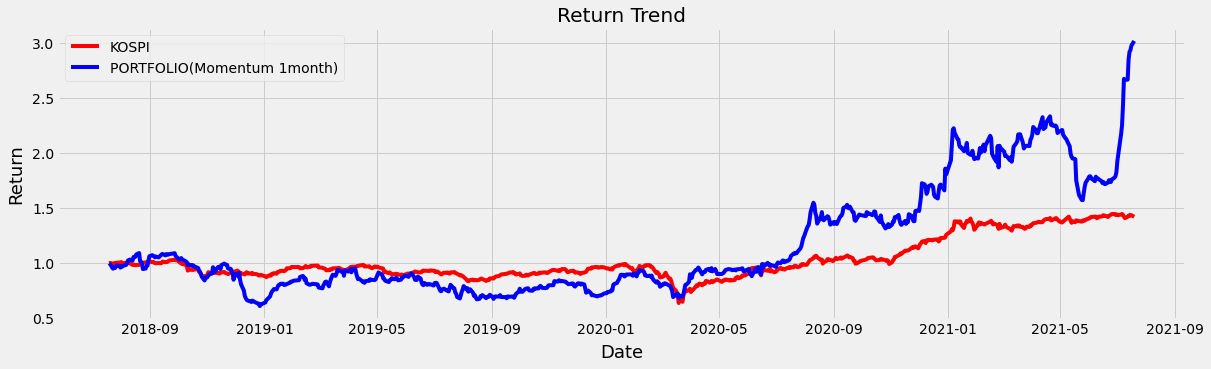

In [131]:
# 포트폴리오와 KOSPI 지수의 '누적 수익률 추이'를 시각화하여 비교

# matplotlib.pyplot 스타일시트 설정
plt.style.use('fivethirtyeight')

plt.figure(figsize=(18,5))
plt.plot(wealth2.index, wealth2.KOSPI , 'r', label='KOSPI')
plt.plot(wealth2.index, wealth2.PORTFOLIO ,'b', label="PORTFOLIO(Momentum 1month)")
plt.grid(True)
plt.title('Return Trend')
plt.xlabel('Date',fontsize=18, labelpad=7)
plt.ylabel('Return',fontsize=18, labelpad=7)
plt.legend(loc='best')
plt.show()

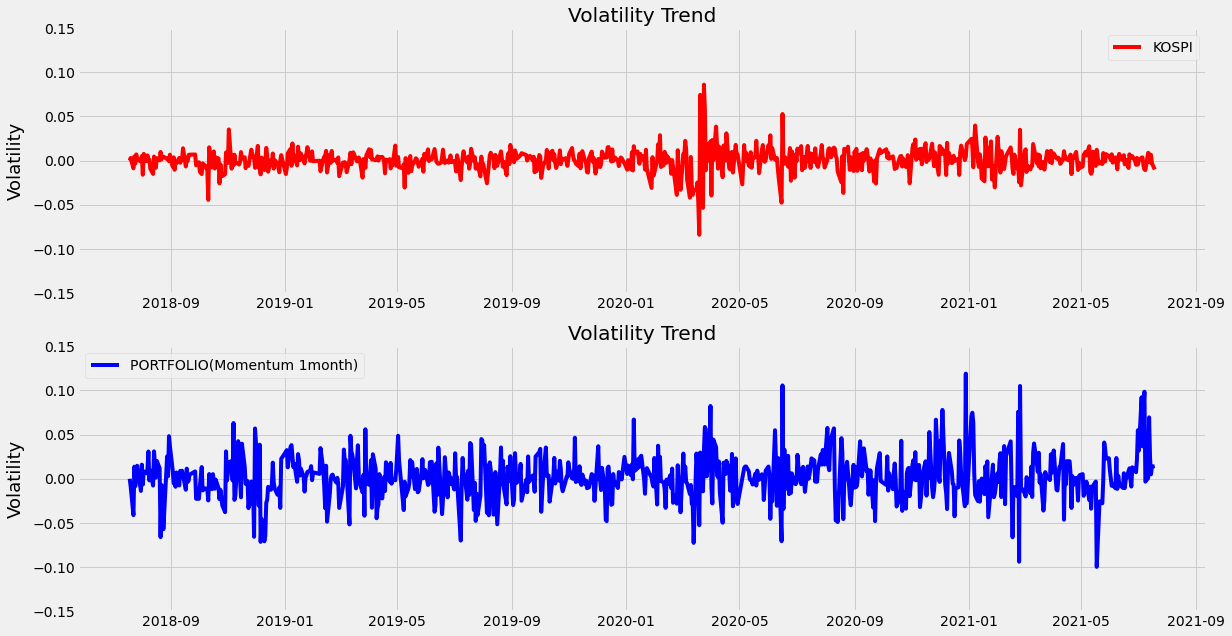

In [132]:
# 변동률 비교
plt.figure(figsize=(18,10))

plt.subplot(2,1,1)
plt.title('Volatility Trend')

plt.plot(result2.index, result2.KOSPI , 'r', label='KOSPI')
plt.yticks([-0.15, -0.10, -0.05, 0.00, 0.05, 0.10, 0.15])
plt.grid(True)
plt.ylabel('Volatility',fontsize=18, labelpad=7)
plt.legend(loc='best')

plt.subplot(2,1,2)
plt.title('Volatility Trend')
plt.plot(result2.index, result2.PORTFOLIO ,'b', label="PORTFOLIO(Momentum 1month)")
plt.yticks([-0.15, -0.10, -0.05, 0.00, 0.05, 0.10, 0.15])
plt.ylabel('Volatility',fontsize=18, labelpad=7)
plt.legend(loc='best')

plt.grid(True)
plt.show()

In [128]:
portfolio_df_sorted2

,종목명,종목코드,수량(주),투자금액(원),투자비중
0,한일단조,024740,367.0,1868030.0,0.124539
1,키네마스터,139670,65.0,1729000.0,0.115270
2,바이오니아,064550,46.0,1644500.0,0.109637
3,씨이랩,189330,16.0,1372800.0,0.091523
4,한신기계,011700,287.0,1216880.0,0.081128
5,아즈텍WB,032080,393.0,1151490.0,0.076768
6,디지아이,043360,174.0,1009200.0,0.067282
7,범양건영,002410,114.0,933660.0,0.062246
8,인바이오젠,101140,169.0,764725.0,0.050983
9,한컴MDS,086960,29.0,729350.0,0.048625


In [130]:
print('-----  Momentum 1month portfolio performance -----')
# Show Risk Limit
print('Risk limit: ', vol_limit2)

# Show Funds
print('Funds:', portfolio_val, 'KRW')

# Show Funds Remaining
print('Funds Remaining: ', leftover2, ' KRW')

# Show Portfolio performance
ef2.portfolio_performance(verbose=True)
rmse2 = da2._allocation_rmse_error(verbose=False)

-----  Momentum 1month portfolio performance -----
Risk limit:  0.3
Funds: 15000000 KRW
Funds Remaining:  470.0  KRW
Expected annual return: 49.8%
Annual volatility: 30.0%
Sharpe Ratio: 1.59
Allocation has RMSE: 0.000
